# Activity Title: Analyzing Movie Ratings with Data Mining

---

## Objective
- Understand and apply basic data mining techniques.
- Gain hands-on experience with data exploration, preprocessing, and visualization.

---

### Import packages, define and read path to the dataset

In [99]:
import pandas as pd                     
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
dataset_path = "dataset/IMDB-Movie-Data.csv"
df = pd.read_csv(dataset_path)

### Dataset Exploration

In [101]:
rows = len(df)
print(f'There are total of {rows} rows in the dataset.')    # Get all row counts in the dataset.

print(rows)

There are total of 1000 rows in the dataset.
1000


In [102]:
# df.head(pd.set_option('display.max_rows', None))

1. **Dataset Exploration**
   - **How many movies are listed?** There are 1000 movies (rows).
   - **What attributes are available (e.g., title, genre, rating, year)?**
       - There are 12 categories in a dataset:
       1. Rank
       2. Title
       3. Genre
       4. Description
       5. Director
       6. Actors
       7. Year
       8. Runtime (Minutes)
       9. Rating
       10. Votes
       11. Revenue
       12. Metascore

---

### 2.A - 2.C | Data Cleaning

In [103]:
print(f'List of columns: {df.columns.tolist()}')

List of columns: ['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)', 'Metascore']


In [104]:
critical_columns = ["Title", "Director", "Genre", "Description"]
df_cleaned = df.dropna(subset=critical_columns) # Drop rows with missing values in critical columns
df_cleaned = df_cleaned.drop_duplicates(subset=critical_columns) # Drop duplicates
# df.head(pd.set_option('display.max_rows', None))

In [105]:
# Fill missing values with median.
df['Runtime (Minutes)'].fillna(df['Runtime (Minutes)'].median(), inplace=True)  
df['Rating'].fillna(df['Rating'].mean(), inplace=True)
df['Votes'].fillna(df['Votes'].median(), inplace=True)
df['Revenue (Millions)'].fillna(df['Revenue (Millions)'].median(), inplace=True)
df['Metascore'].fillna(df['Metascore'].mean(), inplace=True)

df = df.round(2)    # Round off the values to 2 decimal places.
df["Genre"] = df["Genre"].str.lower()   # Convert Genre to lowercase.

---

### 3.A | Create a new column categorizing movies into group based on their ratings

In [106]:
def categorize_rating(rating):
    if rating >= 8:
        return "Excellent"
    elif 6 <= rating < 8:
        return "Good"
    elif 4 <= rating < 6:
        return "Average"
    else:
        return "Poor"
    
df["Rating Category"] = df["Rating"].apply(categorize_rating)   # Create a new column Rating Category.
# df.head(pd.set_option('display.max_rows', None))

---

### 3.B | Extract the year from the release date column (if applicable) and group movies by decade.

In [107]:
df["Decade"] =(df["Year"] // 10) * 10   # Create a new column Decade.
decade_counts = df.groupby("Decade").size().reset_index(name="Movie Count")   # Get the count of movies in each decade.

# df.head(pd.set_option('display.max_rows', None))

---

### 4.A | Bar chart showing the number of movies in each genre.

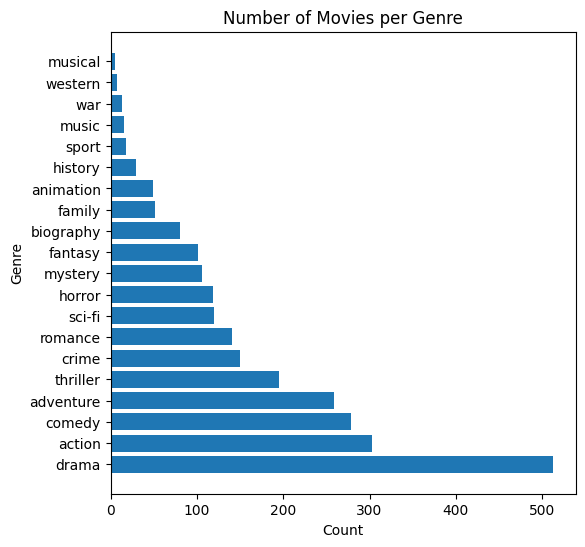

In [108]:
df["Genre"] = df["Genre"].apply(lambda g: g.split(",")) # Split the genres
df = df.explode("Genre") # Explode the genres
df["Genre"] = df["Genre"].str.strip() # Strip the genres

plt.figure(figsize=(6, 6))
plt.barh(df["Genre"].value_counts().index, df["Genre"].value_counts().values)
plt.title("Number of Movies per Genre")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

# df.head(pd.set_option('display.max_rows', None))

---

### 4.B | Pie Chart for Rating Category/Genre

/tmp/ipykernel_24821/656200848.py:9: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(genre_labels, labels=count_label, title="Genre", loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))


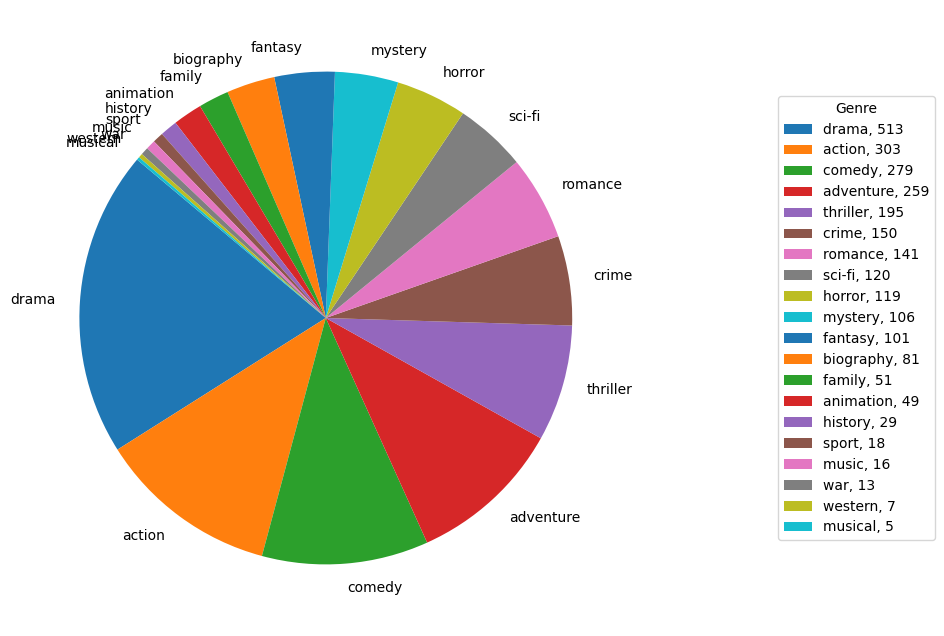

In [109]:
# Get all value in Genre column
genre_labels = df["Genre"].value_counts().index
count_label = [f'{l}, {s:0.0f}' for l, s in zip(genre_labels, df["Genre"].value_counts().values)]

plt.figure(figsize=(8, 8))

plt.pie(df["Genre"].value_counts().values, labels=genre_labels, startangle=140)

plt.legend(genre_labels, labels=count_label, title="Genre", loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

---

### 4.C | A line graph or histogram showing how movie ratings have changed over decades.

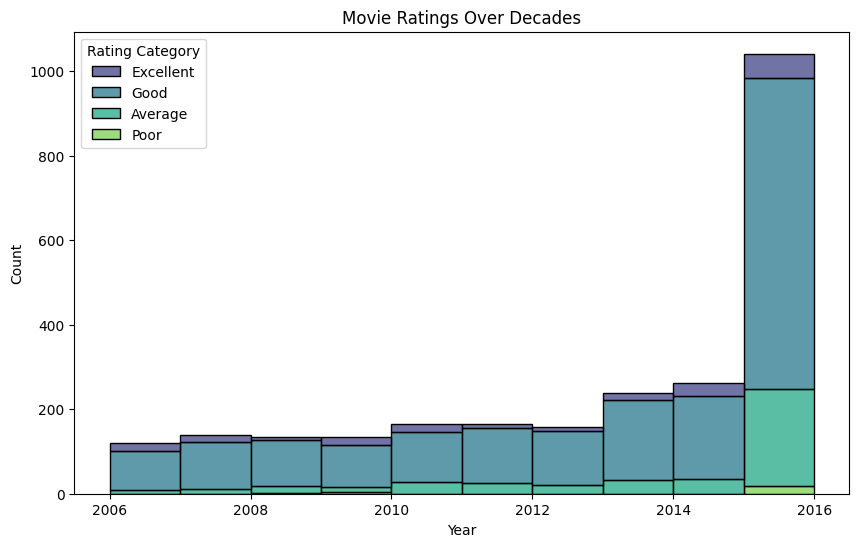

In [110]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Year", hue="Rating Category", multiple="stack", palette="viridis", bins=10)
plt.title("Movie Ratings Over Decades")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

---

### 5.A | Which genre has the highest average rating?

In [111]:
# Group by Genre and calculate the mean rating
genre_avg_rating = df_cleaned.groupby('Genre')['Rating'].mean().reset_index()
genre_avg_rating = genre_avg_rating.sort_values(by='Rating', ascending=True)
genre_avg_rating['Rating'] = genre_avg_rating['Rating'].round(2)  # Format the 'Rating' column to two decimal places

# print(genre_avg_rating.head(1))
# print(genre_avg_rating)
pd.DataFrame(genre_avg_rating, columns=['Genre', 'Rating'])

,Genre,Rating
188,"Fantasy,Horror,Thriller",3.20
138,"Comedy,Western",4.80
203,Sci-Fi,4.95
204,"Sci-Fi,Thriller",5.00
44,"Action,Fantasy,Thriller",5.20
168,"Drama,Horror,Thriller",5.23
46,"Action,Horror",5.30
30,"Action,Crime,Sport",5.30
121,"Comedy,Family,Fantasy",5.30
83,"Adventure,Horror",5.30


---

### 5.B | Which decade produced the most "Excellent" movies?

In [112]:
excellent_movies = df[df["Rating Category"] == "Excellent"]
decade_excellent_counts = excellent_movies.groupby("Decade").size().reset_index(name="Excellent Movie Count")
most_excellent_decade = decade_excellent_counts.loc[decade_excellent_counts["Excellent Movie Count"].idxmax()]

print(f"The decade that produced the most 'Excellent' movies is the {most_excellent_decade['Decade']}s with {most_excellent_decade['Excellent Movie Count']} movies.")

The decade that produced the most 'Excellent' movies is the 2010s with 141 movies.


---

### 5.C | What is the most common rating category?

In [113]:
most_common_rating_category = df["Rating Category"].value_counts().idxmax()
print(f"The most common rating category is: {most_common_rating_category}")

The most common rating category is: Good


---

#### Report Findings

During the analysis of the IMDB movie dataset, several interesting patterns and insights were observed:

1. **Number of Movies per Genre**:
    - The bar chart shows the distribution of movies across different genres. Drama, Action, and Comedy are the most common genres.
    ![alt text](charts/barchart.png)

2. **Genre Distribution**:
    - The pie chart illustrates the proportion of movies in each genre. Drama is the most prevalent genre, followed by Action and Comedy.
    ![alt text](charts/piechart.png)

3. **Rating Distribution Over Decades**:
    - The histogram shows that there is a noticeable increase in the number of movies with higher ratings in recent decades.
    ![alt text](charts/histogram.png)

4. **Average Rating by Genre**:
    - The genre with the highest average rating is "Animation, Drama, Fantasy" with an average rating of 8.60.

5. **Most Excellent Movies by Decade**:
    - The decade that produced the most "Excellent" movies is the 2010s, with a total of 141 movies.

6. **Most Common Rating Category**:
    - The most common rating category is "Good".


